<a href="https://colab.research.google.com/github/DheerajDinesh/CognoRise_Hackathon/blob/main/Cognorise_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connect google drive to input the data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# train and test data input

df_train = pd.read_csv('/content/drive/MyDrive/CognoRise Infotech/Hackathon/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CognoRise Infotech/Hackathon/test.csv')

Train Dataset Transformation

In [4]:
df_train

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81
...,...,...,...,...,...,...,...,...,...
31994,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80
31995,EXA031996,none,female,high school,standard,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,standard,Section D,75,32,82


In [5]:
df_train.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [6]:
df_train.tail()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
31994,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80
31995,EXA031996,none,female,high school,standard,Section B,100,80,68
31996,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74
31997,EXA031998,none,male,associate's degree,standard,Section D,75,32,82
31998,EXA031999,none,male,some high school,standard,Section C,51,92,82


In [7]:
df_train.isna().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64

In [8]:
df_train.dtypes

Roll no                        object
test preparation               object
gender                         object
parental level of education    object
lunch                          object
Section                        object
practical score                 int64
viva score                      int64
exam score                      int64
dtype: object

Exploratory Data Analysis

In [9]:
# convert all features into a numerical value

for i in df_train.columns:
  print(f'Column is {i}')
  print(df_train[i].unique())
  print('*'*100)

Column is Roll no
['EXA000001' 'EXA000002' 'EXA000003' ... 'EXA031997' 'EXA031998'
 'EXA031999']
****************************************************************************************************
Column is test preparation 
['none' 'completed']
****************************************************************************************************
Column is gender
['male' 'female']
****************************************************************************************************
Column is parental level of education
['some college' "master's degree" 'high school' "associate's degree"
 'some high school' "bachelor's degree"]
****************************************************************************************************
Column is lunch
['standard' 'free/reduced']
****************************************************************************************************
Column is Section
['Section A' 'Section C' 'Section E' 'Section D' 'Section B']
******************************************

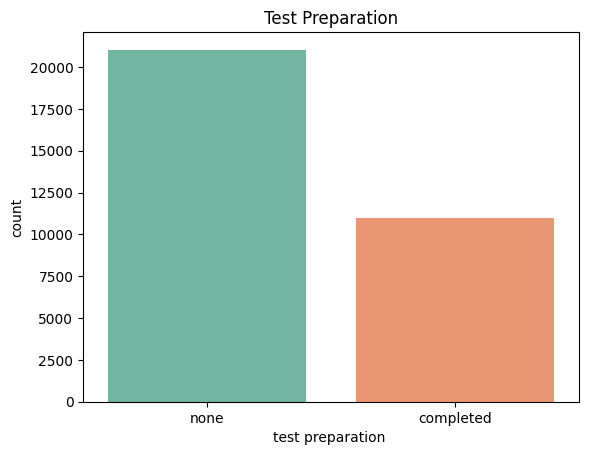

In [10]:
sns.countplot(x = df_train['test preparation '], palette = 'Set2')
plt.title('Test Preparation')
plt.show()

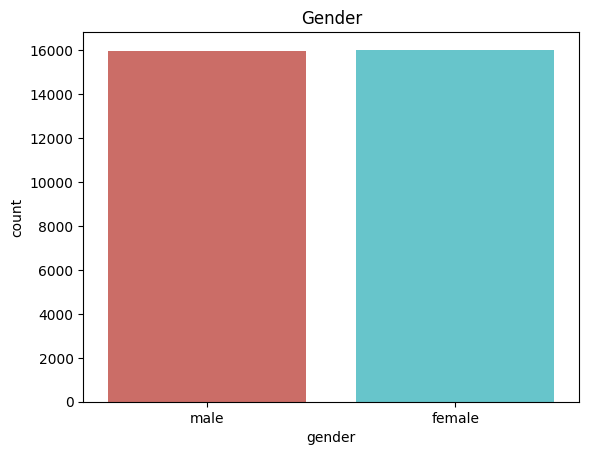

In [11]:
sns.countplot(x = df_train['gender'], palette = 'hls')
plt.title('Gender')
plt.show()

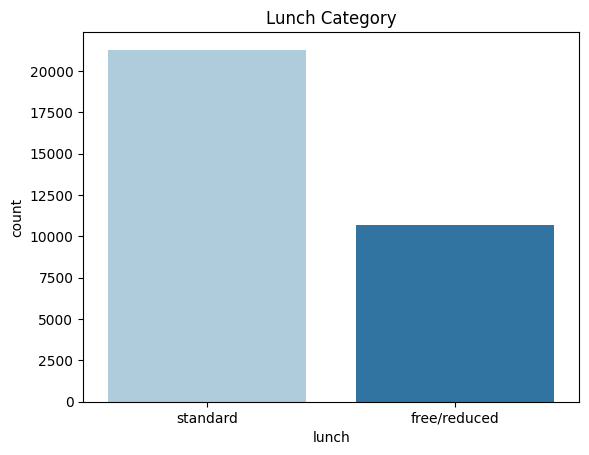

In [12]:
sns.countplot(x = df_train['lunch'], palette = 'Paired')
plt.title('Lunch Category')
plt.show()

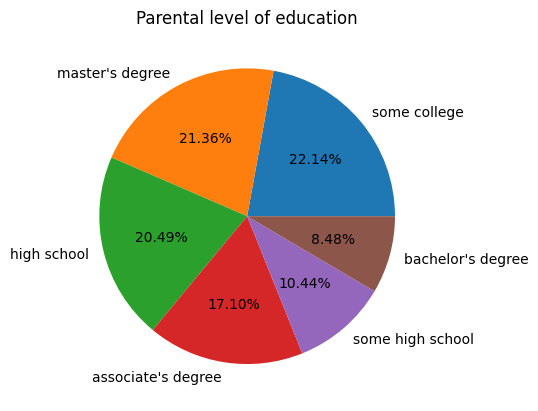

In [13]:
plt.pie(df_train['parental level of education'].value_counts(), labels = df_train['parental level of education'].unique(), autopct = '%0.2f%%', )
plt.title('Parental level of education')
plt.show()

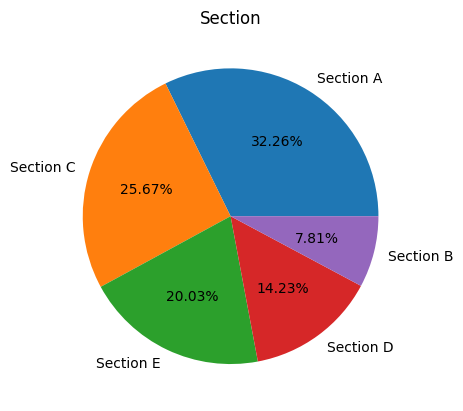

In [14]:
plt.pie(df_train['Section'].value_counts(), labels = df_train['Section'].unique(), autopct = '%0.2f%%')
plt.title('Section')
plt.show()

In [15]:
# All values other than the last three columns contains objects
# Columns 'test preparation', 'gender' and 'lunch' is binary objects, let's convert them into binary digits (0,1)
# Since I have to convert test data too, I'll use map function so as to remove any ambiguity amongs the two tables

df_train['test preparation '] = df_train['test preparation '].map({'none' : 0, 'completed' : 1})

# 1 if female, 0 if male
df_train['female'] = df_train['gender'].map({'male' : 0, 'female' : 1})

# is_lunch_free is 1 if free/reduced and 0 if standard
df_train['is_lunch_free'] = df_train['lunch'].map({'free/reduced' : 1, 'standard' : 0})

# drop the unwanted columns
df_train.drop(['gender', 'lunch'], axis = 1, inplace = True)

df_train.head()

,Roll no,test preparation,parental level of education,Section,practical score,viva score,exam score,female,is_lunch_free
0,EXA000001,0,some college,Section A,70,73,70,0,0
1,EXA000002,0,master's degree,Section C,55,54,52,0,1
2,EXA000003,0,master's degree,Section E,56,46,43,0,1
3,EXA000004,0,some college,Section C,35,47,41,1,1
4,EXA000005,0,high school,Section C,87,92,81,1,0


In [16]:
# now the other columns with more than binary values

for i in df_train.columns:
  if df_train[i].dtypes == object:
    unique_values = len(df_train[i].unique())  # no. of unique values
    print(f'Column \'{i}\' contain {unique_values} of unique values')
    print('*'*100)

Column 'Roll no' contain 31999 of unique values
****************************************************************************************************
Column 'parental level of education' contain 6 of unique values
****************************************************************************************************
Column 'Section' contain 5 of unique values
****************************************************************************************************


In [17]:
# In the case of column 'Roll no', it is unique for each row so we can conclude
# that that feature is irrelavant. So drop that dependent variable
# But in the case of output, roll number is required so create a list of only that column

roll_no_train = df_train['Roll no']  # variable containing all the roll_no of train data
df_train.drop(['Roll no'], axis = 1, inplace = True)
roll_no_train

0        EXA000001
1        EXA000002
2        EXA000003
3        EXA000004
4        EXA000005
           ...    
31994    EXA031995
31995    EXA031996
31996    EXA031997
31997    EXA031998
31998    EXA031999
Name: Roll no, Length: 31999, dtype: object

In [18]:
# now the remaining two columns have at max 6 unique values which can be converted to
# numerical values by get_dummies function. But since there is a test dataset, we have
# to make sure the data transformation done in both the dataset are the same.
# So a unique approach of first label encoding using the train dataset and then get_dummies
# is used here. But first let's bring the test dataset to the current transformation

Test Dataset Transformation

In [19]:
# Performing all the above steps on test data

df_test.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62


In [20]:
df_test.tail()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
95,EXA32095,none,male,bachelor's degree,standard,Section B,82,84
96,EXA32096,completed,male,associate's degree,free/reduced,Section B,70,58
97,EXA32097,none,male,some college,standard,Section C,76,67
98,EXA32098,completed,male,associate's degree,standard,Section A,62,71
99,EXA32099,none,male,high school,standard,Section B,58,67


In [21]:
df_test.isna().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
dtype: int64

In [22]:
df_test.dtypes

Roll no                        object
test preparation               object
gender                         object
parental level of education    object
lunch                          object
Section                        object
practical score                 int64
viva score                      int64
dtype: object

In [23]:
# encoding

df_test['test preparation '] = df_test['test preparation '].map({'none' : 0, 'completed' : 1})

# 1 if female, 0 if male
df_test['female'] = df_test['gender'].map({'male' : 0, 'female' : 1})

# is_lunch_free is 1 if free/reduced and 0 if standard
df_test['is_lunch_free'] = df_test['lunch'].map({'free/reduced' : 1, 'standard' : 0})

# drop the unwanted columns
df_test.drop(['gender', 'lunch'], axis = 1, inplace = True)
roll_no_test = df_test['Roll no']  # variable containing all the roll_no of test data. Used in output table
df_test.drop(['Roll no'], axis = 1, inplace = True)

df_test.head()

,test preparation,parental level of education,Section,practical score,viva score,female,is_lunch_free
0,0,associate's degree,Section C,74,89,0,0
1,1,some high school,Section E,66,75,0,0
2,0,some high school,Section C,52,55,0,0
3,1,some high school,Section D,69,85,0,0
4,0,bachelor's degree,Section E,46,62,1,0


In [24]:
roll_no_test

0     EXA32000
1     EXA32001
2     EXA32002
3     EXA32003
4     EXA32004
        ...   
95    EXA32095
96    EXA32096
97    EXA32097
98    EXA32098
99    EXA32099
Name: Roll no, Length: 100, dtype: object

In [25]:
for i in df_test.columns:
  if df_test[i].dtypes == object:
    print(f'Column is {i}')
    print(df_test[i].unique())
    print('*'*100)

Column is parental level of education
["associate's degree" 'some high school' "bachelor's degree"
 "master's degree" 'some college' 'high school']
****************************************************************************************************
Column is Section
['Section C' 'Section E' 'Section D' 'Section A' 'Section B']
****************************************************************************************************


In [26]:
df_test.dtypes  # both dataset at same transformed level

test preparation                int64
parental level of education    object
Section                        object
practical score                 int64
viva score                      int64
female                          int64
is_lunch_free                   int64
dtype: object

Label Encoding Both Dataframe

In [27]:
df_train.head()

,test preparation,parental level of education,Section,practical score,viva score,exam score,female,is_lunch_free
0,0,some college,Section A,70,73,70,0,0
1,0,master's degree,Section C,55,54,52,0,1
2,0,master's degree,Section E,56,46,43,0,1
3,0,some college,Section C,35,47,41,1,1
4,0,high school,Section C,87,92,81,1,0


In [28]:
df_test.head()

,test preparation,parental level of education,Section,practical score,viva score,female,is_lunch_free
0,0,associate's degree,Section C,74,89,0,0
1,1,some high school,Section E,66,75,0,0
2,0,some high school,Section C,52,55,0,0
3,1,some high school,Section D,69,85,0,0
4,0,bachelor's degree,Section E,46,62,1,0


In [29]:
# encoding the rest

from sklearn.preprocessing import LabelEncoder

cols = ['parental level of education', 'Section']

le = LabelEncoder()

for i in cols:

  # Fit on the combined unique values from both train and test data
  unique_vals = list(set(df_train[i].unique()).union(set(df_test[i].unique())))
  le.fit(unique_vals)
  df_train[i] = le.transform(df_train[i])
  df_test[i] = le.transform(df_test[i])

df_train.head()

,test preparation,parental level of education,Section,practical score,viva score,exam score,female,is_lunch_free
0,0,4,0,70,73,70,0,0
1,0,3,2,55,54,52,0,1
2,0,3,4,56,46,43,0,1
3,0,4,2,35,47,41,1,1
4,0,2,2,87,92,81,1,0


In [30]:
df_test.head()

,test preparation,parental level of education,Section,practical score,viva score,female,is_lunch_free
0,0,0,2,74,89,0,0
1,1,5,4,66,75,0,0
2,0,5,2,52,55,0,0
3,1,5,3,69,85,0,0
4,0,1,4,46,62,1,0


In [31]:
df_test.dtypes # succesfully converted all values to digits

test preparation               int64
parental level of education    int64
Section                        int64
practical score                int64
viva score                     int64
female                         int64
is_lunch_free                  int64
dtype: object

<Axes: >

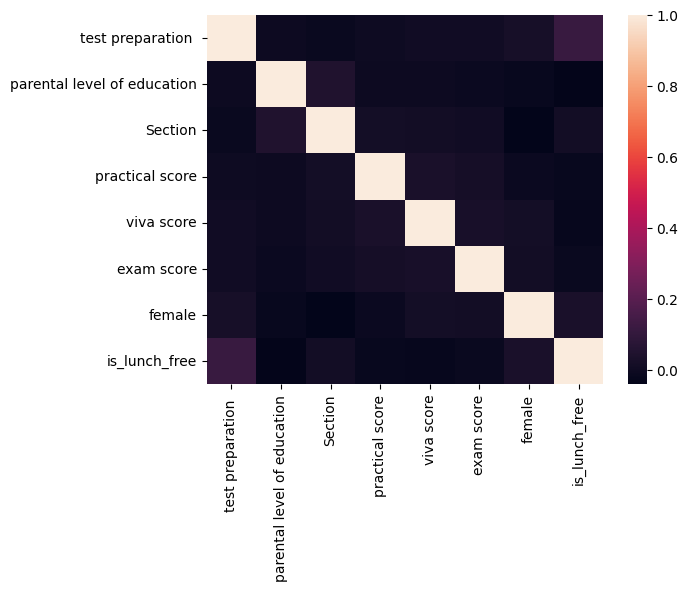

In [32]:
sns.heatmap(df_train.corr())  # no too much correlation betwenn the columns

In [33]:
df_train.corr()

,test preparation,parental level of education,Section,practical score,viva score,exam score,female,is_lunch_free
test preparation,1.000000,-0.007391,-0.013574,-0.004867,0.003103,0.006487,0.019780,0.116727
parental level of education,-0.007391,1.000000,0.045681,-0.008158,-0.007287,-0.010601,-0.019723,-0.035233
Section,-0.013574,0.045681,1.000000,0.011162,0.008599,0.003390,-0.041853,0.008673
practical score,-0.004867,-0.008158,0.011162,1.000000,0.029377,0.017707,-0.011905,-0.019459
viva score,0.003103,-0.007287,0.008599,0.029377,1.000000,0.024492,0.011827,-0.022187
exam score,0.006487,-0.010601,0.003390,0.017707,0.024492,1.000000,0.007750,-0.013910
female,0.019780,-0.019723,-0.041853,-0.011905,0.011827,0.007750,1.000000,0.030597
is_lunch_free,0.116727,-0.035233,0.008673,-0.019459,-0.022187,-0.013910,0.030597,1.000000


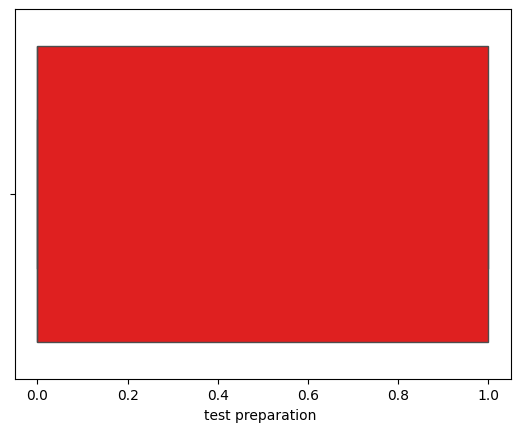

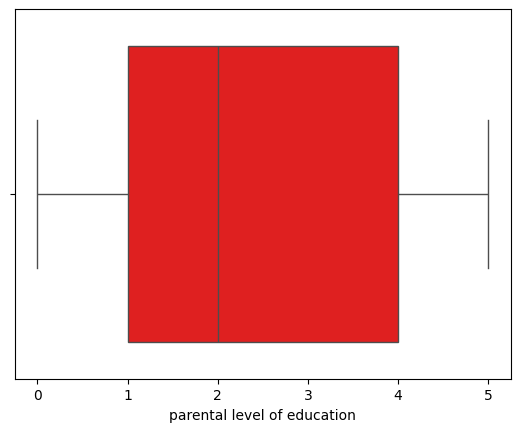

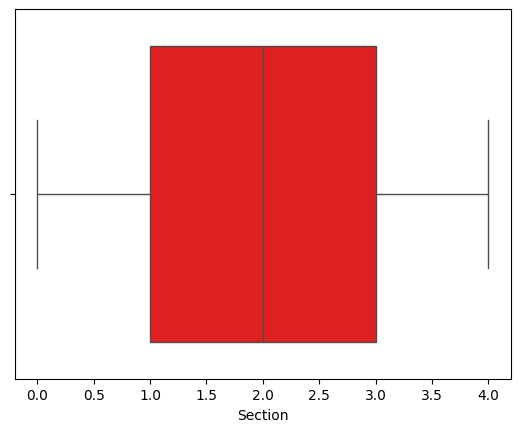

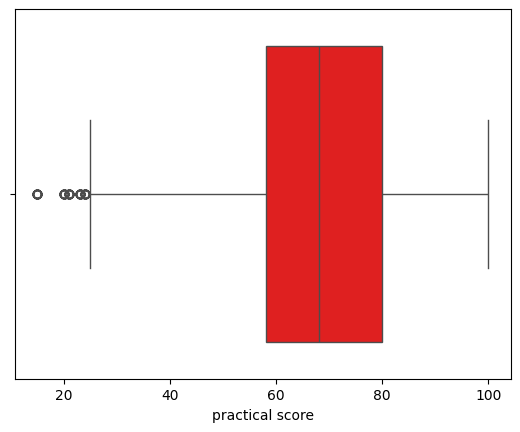

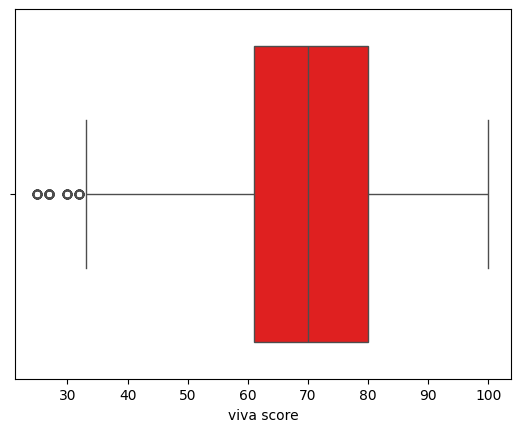

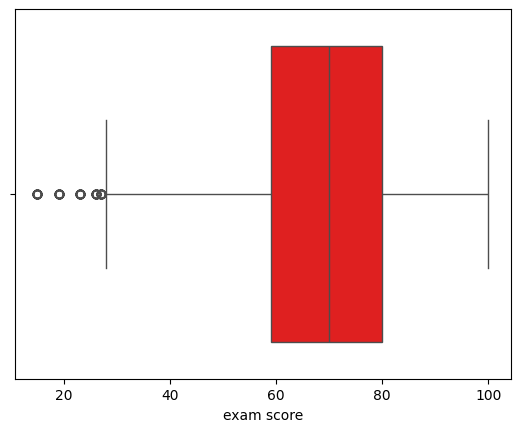

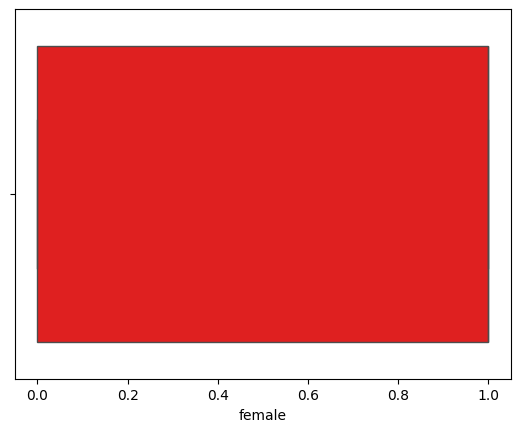

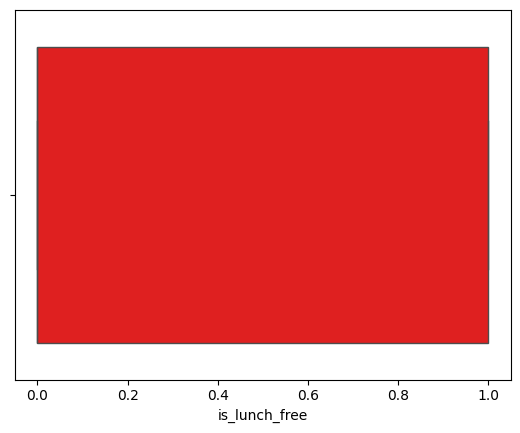

In [34]:
for i in df_train.columns:
  sns.boxplot(x=df_train[i], color = 'red')
  plt.show()

In [35]:
out_cols = ['practical score', 'viva score', 'exam score']

def remove_outliers_iqr(df):
  total_removed = 0
  for col in out_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


  return df

filtered_data = remove_outliers_iqr(df_train)
filtered_data.reset_index(drop=True, inplace=True)

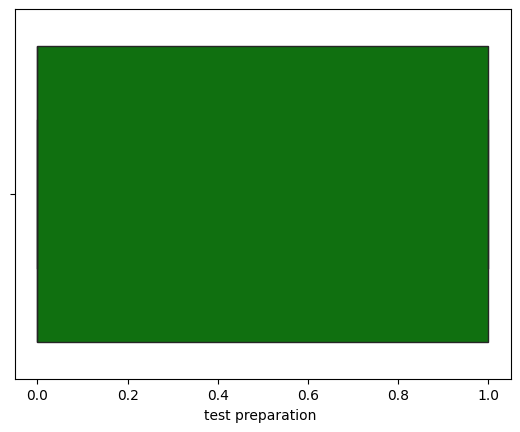

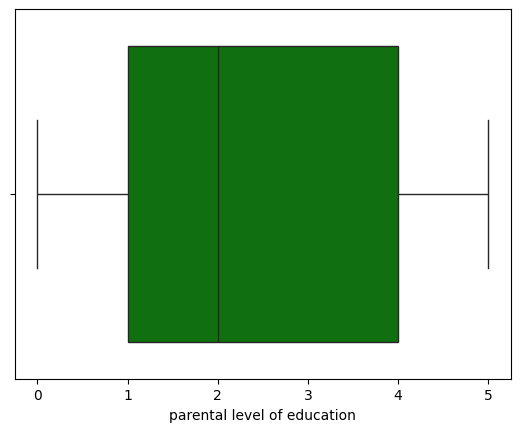

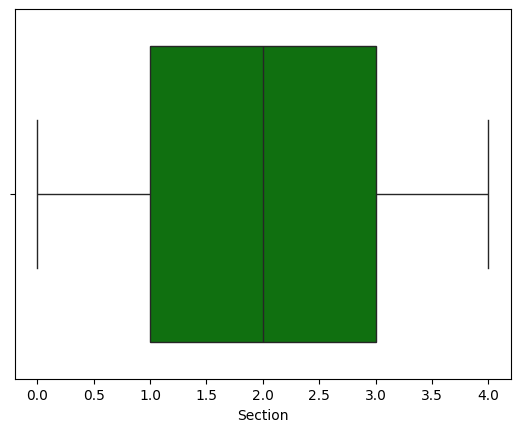

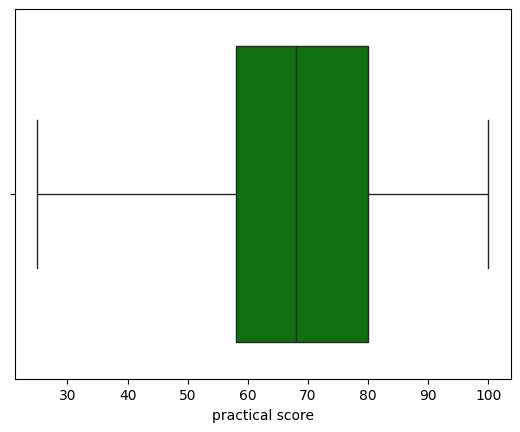

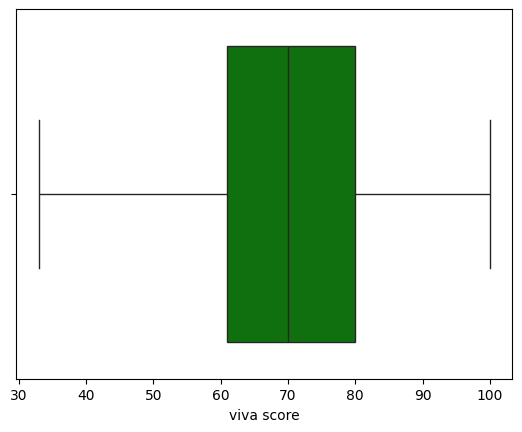

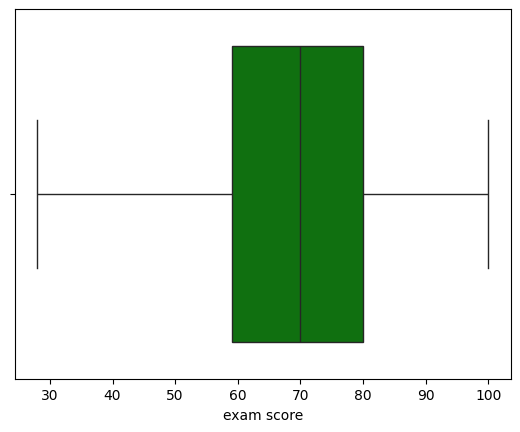

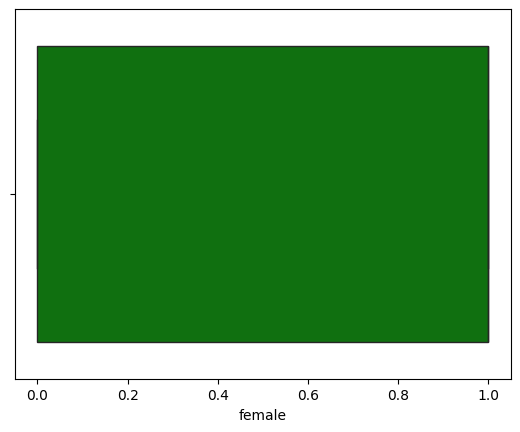

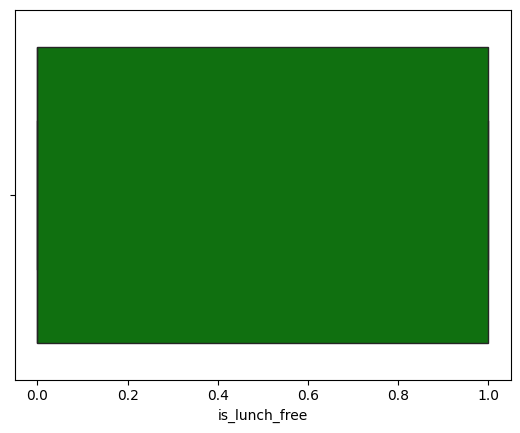

In [36]:
for i in filtered_data.columns:
  sns.boxplot(x=filtered_data[i], color = 'green')
  plt.show()

In [37]:
# outliers removed
filtered_data

,test preparation,parental level of education,Section,practical score,viva score,exam score,female,is_lunch_free
0,0,4,0,70,73,70,0,0
1,0,3,2,55,54,52,0,1
2,0,3,4,56,46,43,0,1
3,0,4,2,35,47,41,1,1
4,0,2,2,87,92,81,1,0
...,...,...,...,...,...,...,...,...
31516,1,1,1,62,73,79,1,0
31517,0,5,4,63,53,80,0,1
31518,0,2,1,100,80,68,1,0
31519,0,1,1,62,61,74,0,1


Data Modelling

In [38]:
x = filtered_data.drop(['exam score'], axis = 1)
y = filtered_data['exam score']

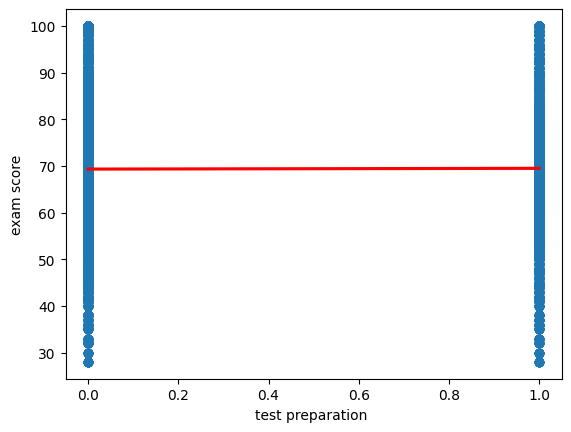

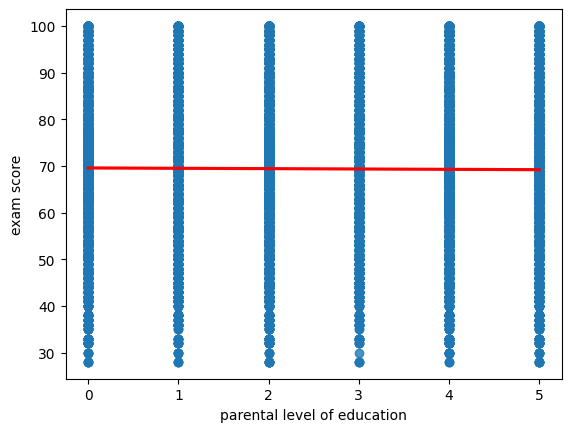

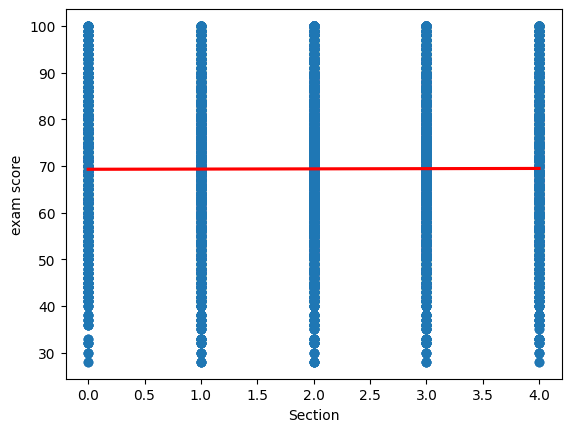

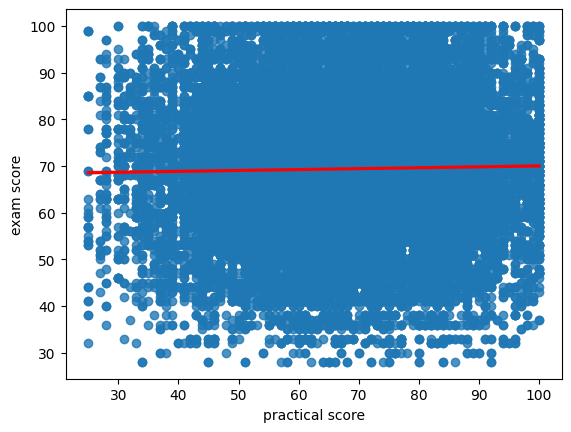

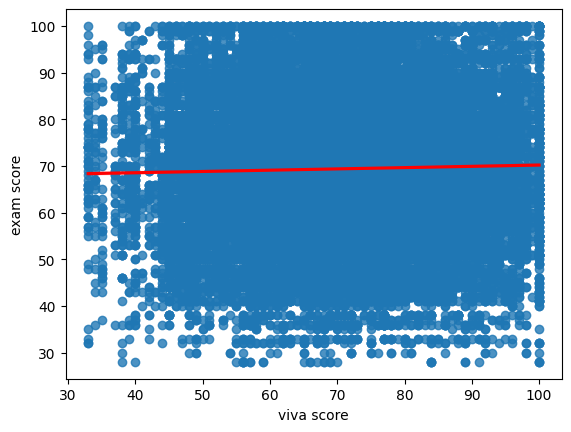

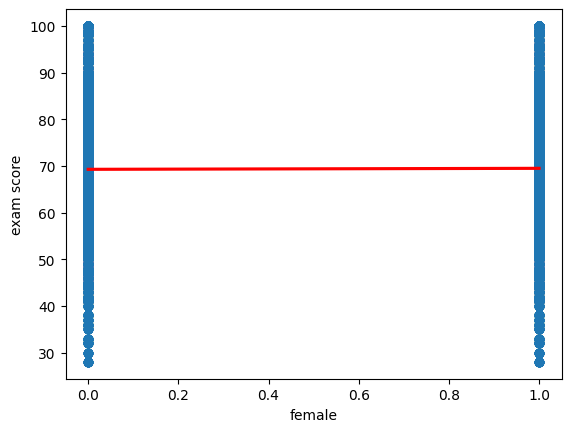

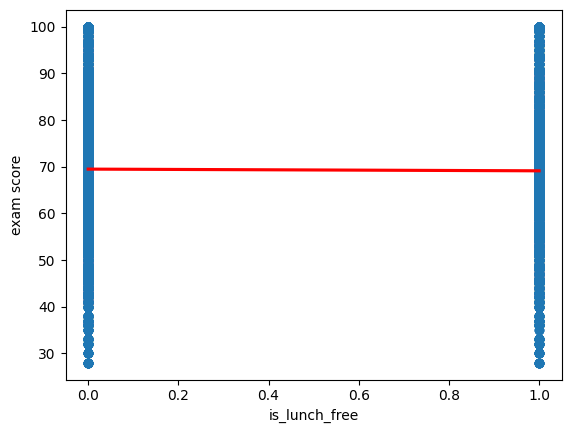

In [39]:
# regression plot

for i in x.columns:
  sns.regplot(x=x[i],y=y,line_kws={'color':'red'})
  plt.show()  # regression plot doesn't really give any observations in this case

In [40]:
# since the test dataset doesn't contain any target label, we have to convert
# the train data to train and test to check the accuracy.

from sklearn.model_selection import train_test_split
x_train_demo,x_test_demo,y_train_demo,y_test_demo = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train_demo

,test preparation,parental level of education,Section,practical score,viva score,female,is_lunch_free
1658,0,4,4,65,78,0,0
22997,0,4,0,63,60,1,0
6304,1,1,1,76,89,0,0
19482,0,0,2,44,61,1,1
24714,0,2,2,93,73,1,0
...,...,...,...,...,...,...,...
13123,0,4,2,100,63,0,1
19648,1,5,0,53,81,0,0
9845,0,2,4,89,81,1,1
10799,1,0,0,80,46,1,0


In [41]:
x_test_demo

,test preparation,parental level of education,Section,practical score,viva score,female,is_lunch_free
17023,0,0,1,60,68,0,1
3127,0,1,2,64,75,0,0
26296,0,2,4,59,75,1,0
21087,0,4,3,45,84,0,0
26357,1,2,3,79,76,0,0
...,...,...,...,...,...,...,...
28158,1,2,3,71,47,0,0
25957,1,0,2,57,64,0,1
23738,0,0,3,64,58,0,0
6503,0,5,3,71,48,0,0


In [42]:
# Normalisation
# some of the models does not require normalisation like linear model
# but for most it is necessary to get a good prediction

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_demo)
x_train_demo = scaler.transform(x_train_demo)
x_test_demo = scaler.transform(x_test_demo)
x_train_demo

array([[-0.72190287,  0.82850552,  1.58534391, ...,  0.53377665,
        -0.99793994, -0.71163342],
       [-0.72190287,  0.82850552, -1.91610411, ..., -0.77268145,
         1.00206431, -0.71163342],
       [ 1.38522791, -0.8611606 , -1.04074211, ...,  1.33216772,
        -0.99793994, -0.71163342],
       ...,
       [-0.72190287, -0.29793856,  1.58534391, ...,  0.75151967,
         1.00206431,  1.40521787],
       [ 1.38522791, -1.42438264, -1.91610411, ..., -1.78881553,
         1.00206431, -0.71163342],
       [ 1.38522791,  0.82850552, -0.1653801 , ...,  0.38861464,
        -0.99793994, -0.71163342]])

In [43]:
x_test_demo

array([[-0.72190287, -1.42438264, -1.04074211, ..., -0.19203341,
        -0.99793994,  1.40521787],
       [-0.72190287, -0.8611606 , -0.1653801 , ...,  0.31603363,
        -0.99793994, -0.71163342],
       [-0.72190287, -0.29793856,  1.58534391, ...,  0.31603363,
         1.00206431, -0.71163342],
       ...,
       [-0.72190287, -1.42438264,  0.70998191, ..., -0.91784346,
        -0.99793994, -0.71163342],
       [-0.72190287,  1.39172755,  0.70998191, ..., -1.64365352,
        -0.99793994, -0.71163342],
       [-0.72190287, -0.29793856, -1.91610411, ..., -1.49849151,
         1.00206431, -0.71163342]])

In [44]:
y_train_demo

1658     76
22997    52
6304     52
19482    58
24714    64
         ..
13123    89
19648    59
9845     89
10799    60
2732     53
Name: exam score, Length: 25216, dtype: int64

In [45]:
y_test_demo

17023    59
3127     49
26296    67
21087    52
26357    46
         ..
28158    90
25957    81
23738    60
6503     72
15967    57
Name: exam score, Length: 6305, dtype: int64

Model Creation

In [46]:
# Let's use a variety of alogirthms to predict our data

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
model_lst = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(),
             RandomForestRegressor(), GradientBoostingRegressor(),
             XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123),
              KNeighborsRegressor()
             ]

# the algorithms are LinearRegression, Ridge Regression, Lasso Regression,
# Decision Tree Regression, random Forest Regression, Gradient Boosting Regression,
# XG Boost Regression, K Nearest Neighbours Regression

In [47]:
# Define hyperparameter grids for each model

# param_grids = {
#     'LinearRegression': {
#         # Linear Regression has no hyperparameters to tune
#     },
#     'Ridge': {
#         'alpha': [0.01, 0.1, 1, 10, 100]
#     },
#     'Lasso': {
#         'alpha': [0.01, 0.1, 1, 10, 100]
#     },
#     'DecisionTreeRegressor': {
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     'RandomForestRegressor': {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     'GradientBoostingRegressor': {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 4, 5],
#         'subsample': [0.8, 0.9, 1.0]
#     },
#     'XGBRegressor': {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 4, 5],
#         'subsample': [0.8, 0.9, 1.0],
#         'colsample_bytree': [0.8, 0.9, 1.0]
#     },
#     'KNeighborsRegressor': {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance'],
#         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#     }
# }

# # Example code to perform GridSearchCV for each model
# best_models = {}

# for model_name, param_grid in param_grids.items():
#     if model_name == 'LinearRegression':
#         model = LinearRegression()
#         model.fit(x_train_demo, y_train_demo)
#         best_models[model_name] = model
#     else:
#         if model_name == 'Ridge':
#             model = Ridge()
#         elif model_name == 'Lasso':
#             model = Lasso()
#         elif model_name == 'DecisionTreeRegressor':
#             model = DecisionTreeRegressor()
#         elif model_name == 'RandomForestRegressor':
#             model = RandomForestRegressor()
#         elif model_name == 'GradientBoostingRegressor':
#             model = GradientBoostingRegressor()
#         elif model_name == 'XGBRegressor':
#             model = XGBRegressor(objective='reg:linear', seed=123)
#         elif model_name == 'KNeighborsRegressor':
#             model = KNeighborsRegressor()

#         grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
#         grid_search.fit(x_train_demo, y_train_demo)
#         best_models[model_name] = grid_search.best_estimator_

# # Test the best models on the test set and display results
# for model_name, model in best_models.items():
#     y_pred_demo = model.predict(x_test_demo)
#     test_r2_score = r2_score(y_test_demo, y_pred_demo)
#     print(f'{model_name}: R² Score: {test_r2_score}')
#     if model_name != 'LinearRegression':
#         print(f'{model_name} Best Parameters: {model.get_params()}')

In [48]:
# After 41 minutes of executing the above cell, this was the result

# LinearRegression: R² Score: 0.0008662427165262443
# Ridge: R² Score: 0.0008683984853107285
# Ridge Best Parameters: {'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
# Lasso: R² Score: 0.0008299333149675014
# Lasso Best Parameters: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
# DecisionTreeRegressor: R² Score: -0.0607653204134746
# DecisionTreeRegressor Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
# RandomForestRegressor: R² Score: 0.0063359225627348525
# RandomForestRegressor Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
# GradientBoostingRegressor: R² Score: 0.0014644024837345837
# GradientBoostingRegressor Best Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.8, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
# XGBRegressor: R² Score: 0.002123103769759105
# XGBRegressor Best Parameters: {'objective': 'reg:linear', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'seed': 123}
# KNeighborsRegressor: R² Score: -0.0886978775748064
# KNeighborsRegressor Best Parameters: {'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

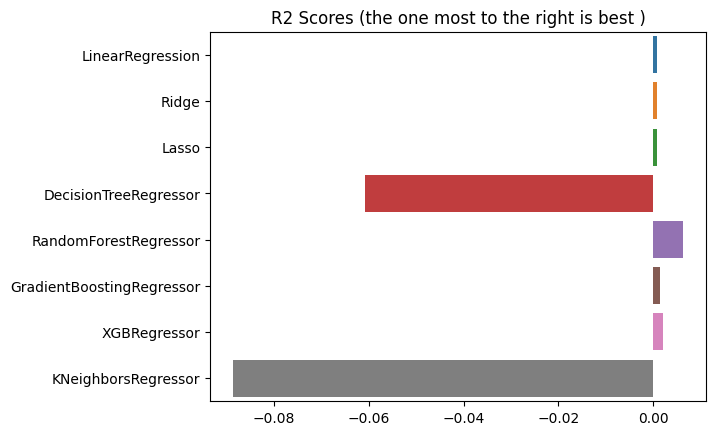

In [49]:
# compare the r2 scores

r2_score_dic = {'LinearRegression' : 0.0008662427165262443,
                'Ridge' : 0.0008683984853107285,
                'Lasso' : 0.0008299333149675014,
                'DecisionTreeRegressor' : -0.0607653204134746,
                'RandomForestRegressor' : 0.0063359225627348525,
                'GradientBoostingRegressor' : 0.0014644024837345837,
                'XGBRegressor' : 0.002123103769759105,
                'KNeighborsRegressor' :-0.0886978775748064}

sns.barplot(x = list(r2_score_dic.values()), y = list(r2_score_dic.keys()), palette = "tab10")
plt.title('R2 Scores (the one most to the right is best )')
plt.show()

In [50]:
# So random forest had the best result.
# Using random forest to create the model

forest = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                               max_depth=10, max_features=1.0, max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=200,
                               n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)


print(f'Model is {forest}')
forest.fit(x_train_demo, y_train_demo)
y_pred_demo = forest.predict(x_test_demo)
print('Predicted value is :')
print(y_pred_demo)
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test_demo,y_pred_demo)))
print('R2 Score :', r2_score(y_test_demo,y_pred_demo))

Model is RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200)
Predicted value is :
[67.86781462 69.52525803 69.40978265 ... 68.99316997 70.31510161
 73.2335663 ]
Root Mean Squared Error : 14.704049244117689
R2 Score : 0.007360846885145822


In [51]:
# r2 score is low but the root mean squared error is fairly good

pred_df = pd.DataFrame({'Actual': y_test_demo, 'Predicted': y_pred_demo, 'Error': abs(y_test_demo - y_pred_demo)})
pred_df

,Actual,Predicted,Error
17023,59,67.867815,8.867815
3127,49,69.525258,20.525258
26296,67,69.409783,2.409783
21087,52,69.548535,17.548535
26357,46,70.601949,24.601949
...,...,...,...
28158,90,67.848671,22.151329
25957,81,68.698513,12.301487
23738,60,68.993170,8.993170
6503,72,70.315102,1.684898


In [52]:
# Error evaluation

print('Max error =', int(max(pred_df['Error'])))
print('Min error =', int(min(pred_df['Error'])))
print('Mean error =', int(pred_df['Error'].mean()))

Max error = 52
Min error = 0
Mean error = 11


Neural Network Model

In [53]:
# initialize all packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# creating a function to calculate r2_score
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [54]:
# Define callbacks

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [55]:
# create ANN model

model = Sequential()

model.add(Dense(64, activation = 'relu', input_dim = x_train_demo.shape[1]))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [56]:
# compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[r2_keras])

In [57]:
# train model

model.fit(x_train_demo, y_train_demo, epochs = 50, validation_data = (x_test_demo, y_test_demo), validation_split = 0.1, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
788/788 [==============================] - 8s 4ms/step - loss: 4970.2124 - r2_keras: -24.2016 - val_loss: 4935.5522 - val_r2_keras: -159602704.0000 - lr: 0.0010
Epoch 2/50
788/788 [==============================] - 3s 4ms/step - loss: 4862.7222 - r2_keras: -23.6101 - val_loss: 4828.6831 - val_r2_keras: -155190864.0000 - lr: 0.0010
Epoch 3/50
788/788 [==============================] - 4s 5ms/step - loss: 4756.8462 - r2_keras: -23.1221 - val_loss: 4723.3984 - val_r2_keras: -150855664.0000 - lr: 0.0010
Epoch 4/50
788/788 [==============================] - 3s 4ms/step - loss: 4652.4629 - r2_keras: -22.6475 - val_loss: 4619.5288 - val_r2_keras: -146590080.0000 - lr: 0.0010
Epoch 5/50
788/788 [==============================] - 3s 4ms/step - loss: 4549.4526 - r2_keras: -22.1182 - val_loss: 4517.0293 - val_r2_keras: -142392080.0000 - lr: 0.0010
Epoch 6/50
788/788 [==============================] - 4s 5ms/step - loss: 4447.7764 - r2_keras: -21.5353 - val_loss: 4415.8110 - val_r2_kera

In [58]:
# evaluate the model

loss, r2_score = model.evaluate(x_train_demo, y_train_demo)
print(f'Training Loss: {loss}')
print(f'Training R² Score: {r2_score}')

# So even after a lot of tries, the r2 score in ANN is not as good as the one in RandomForest

788/788 [==============================] - 2s 2ms/step - loss: 1162.0173 - r2_keras: -4.8672
Training Loss: 1162.017333984375
Training R² Score: -4.867191314697266


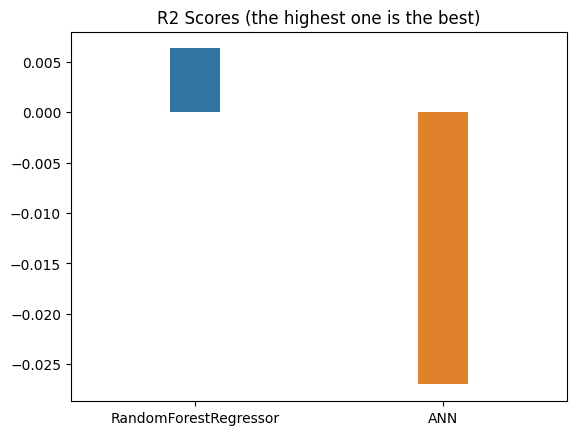

In [59]:
# compare Randomforest and ANN r2 score

r2_score_final_dic = {'RandomForestRegressor' : 0.0063359225627348525,
                      'ANN' : -0.02702215313911438
                      }

sns.barplot(y = list(r2_score_final_dic.values()), x = list(r2_score_final_dic.keys()), palette = "tab10", width = 0.2)
plt.title('R2 Scores (the highest one is the best)')
plt.show()

Actual Prediction using Random Forest Regressor

In [60]:
# train data
filtered_data

,test preparation,parental level of education,Section,practical score,viva score,exam score,female,is_lunch_free
0,0,4,0,70,73,70,0,0
1,0,3,2,55,54,52,0,1
2,0,3,4,56,46,43,0,1
3,0,4,2,35,47,41,1,1
4,0,2,2,87,92,81,1,0
...,...,...,...,...,...,...,...,...
31516,1,1,1,62,73,79,1,0
31517,0,5,4,63,53,80,0,1
31518,0,2,1,100,80,68,1,0
31519,0,1,1,62,61,74,0,1


In [61]:
# test data
df_test

,test preparation,parental level of education,Section,practical score,viva score,female,is_lunch_free
0,0,0,2,74,89,0,0
1,1,5,4,66,75,0,0
2,0,5,2,52,55,0,0
3,1,5,3,69,85,0,0
4,0,1,4,46,62,1,0
...,...,...,...,...,...,...,...
95,0,1,1,82,84,0,0
96,1,0,1,70,58,0,1
97,0,4,2,76,67,0,0
98,1,0,0,62,71,0,0


In [62]:
x_train = filtered_data.drop(['exam score'], axis = 1)
y_train = filtered_data['exam score']

x_test = df_test

In [63]:
# Normalisation

actual_scaler = StandardScaler()
actual_scaler.fit(x_train)
x_train = actual_scaler.transform(x_train)
x_test = actual_scaler.transform(x_test)
x_train

array([[-0.72276268,  0.83002664, -1.91273295, ...,  0.17495173,
        -1.00212783, -0.708268  ],
       [-0.72276268,  0.26697609, -0.16191243, ..., -1.20293206,
        -1.00212783,  1.41189493],
       [-0.72276268,  0.26697609,  1.58890808, ..., -1.78309365,
        -1.00212783,  1.41189493],
       ...,
       [-0.72276268, -0.29607445, -1.03732269, ...,  0.68259313,
         0.99787669, -0.708268  ],
       [-0.72276268, -0.85912499, -1.03732269, ..., -0.69529066,
        -1.00212783,  1.41189493],
       [-0.72276268,  1.39307718, -0.16191243, ...,  1.55283552,
        -1.00212783, -0.708268  ]])

In [64]:
x_test

array([[-0.72276268, -1.42217554, -0.16191243,  0.39742646,  1.33527492,
        -1.00212783, -0.708268  ],
       [ 1.38358001,  1.39307718,  1.58890808, -0.13992809,  0.31999213,
        -1.00212783, -0.708268  ],
       [-0.72276268,  1.39307718, -0.16191243, -1.08029856, -1.13041186,
        -1.00212783, -0.708268  ],
       [ 1.38358001,  1.39307718,  0.71349782,  0.06157987,  1.04519412,
        -1.00212783, -0.708268  ],
       [-0.72276268, -0.85912499,  1.58890808, -1.48331448, -0.62277046,
         0.99787669, -0.708268  ],
       [-0.72276268, -0.85912499, -1.91273295,  0.39742646, -0.76781086,
         0.99787669,  1.41189493],
       [-0.72276268,  0.26697609,  0.71349782,  2.14382877,  0.02991133,
        -1.00212783, -0.708268  ],
       [ 1.38358001,  0.26697609,  0.71349782,  1.00195034, -0.40520986,
         0.99787669, -0.708268  ],
       [-0.72276268,  1.39307718,  0.71349782,  0.93478102, -1.49301286,
        -1.00212783, -0.708268  ],
       [ 1.38358001, -1.4221

In [65]:
y_train

0        70
1        52
2        43
3        41
4        81
         ..
31516    79
31517    80
31518    68
31519    74
31520    82
Name: exam score, Length: 31521, dtype: int64

In [66]:
# model created

forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
y_pred = y_pred.astype(int)
y_pred

array([71, 69, 65, 68, 68, 68, 71, 70, 70, 69, 71, 69, 74, 70, 69, 70, 68,
       68, 69, 68, 68, 57, 71, 65, 70, 70, 69, 68, 70, 69, 68, 71, 68, 71,
       69, 69, 67, 73, 68, 68, 70, 69, 68, 68, 69, 68, 66, 70, 69, 65, 67,
       69, 70, 68, 69, 69, 68, 69, 69, 69, 69, 68, 69, 70, 68, 71, 68, 68,
       69, 68, 68, 61, 69, 68, 67, 69, 69, 67, 69, 69, 69, 68, 69, 69, 67,
       65, 67, 68, 65, 63, 68, 70, 69, 69, 70, 69, 69, 69, 68, 68])

Final Result

In [67]:
# the resultant table

result = pd.DataFrame({'Roll no': roll_no_test, 'Predicted score': y_pred})
result

,Roll no,Predicted score
0,EXA32000,71
1,EXA32001,69
2,EXA32002,65
3,EXA32003,68
4,EXA32004,68
...,...,...
95,EXA32095,69
96,EXA32096,69
97,EXA32097,69
98,EXA32098,68


In [68]:
result.to_csv('Submission File.csv', index = False)